<a href="https://colab.research.google.com/github/zizo155/Heart-Failure-Prediction-/blob/master/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score



In [2]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Programming Project/heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


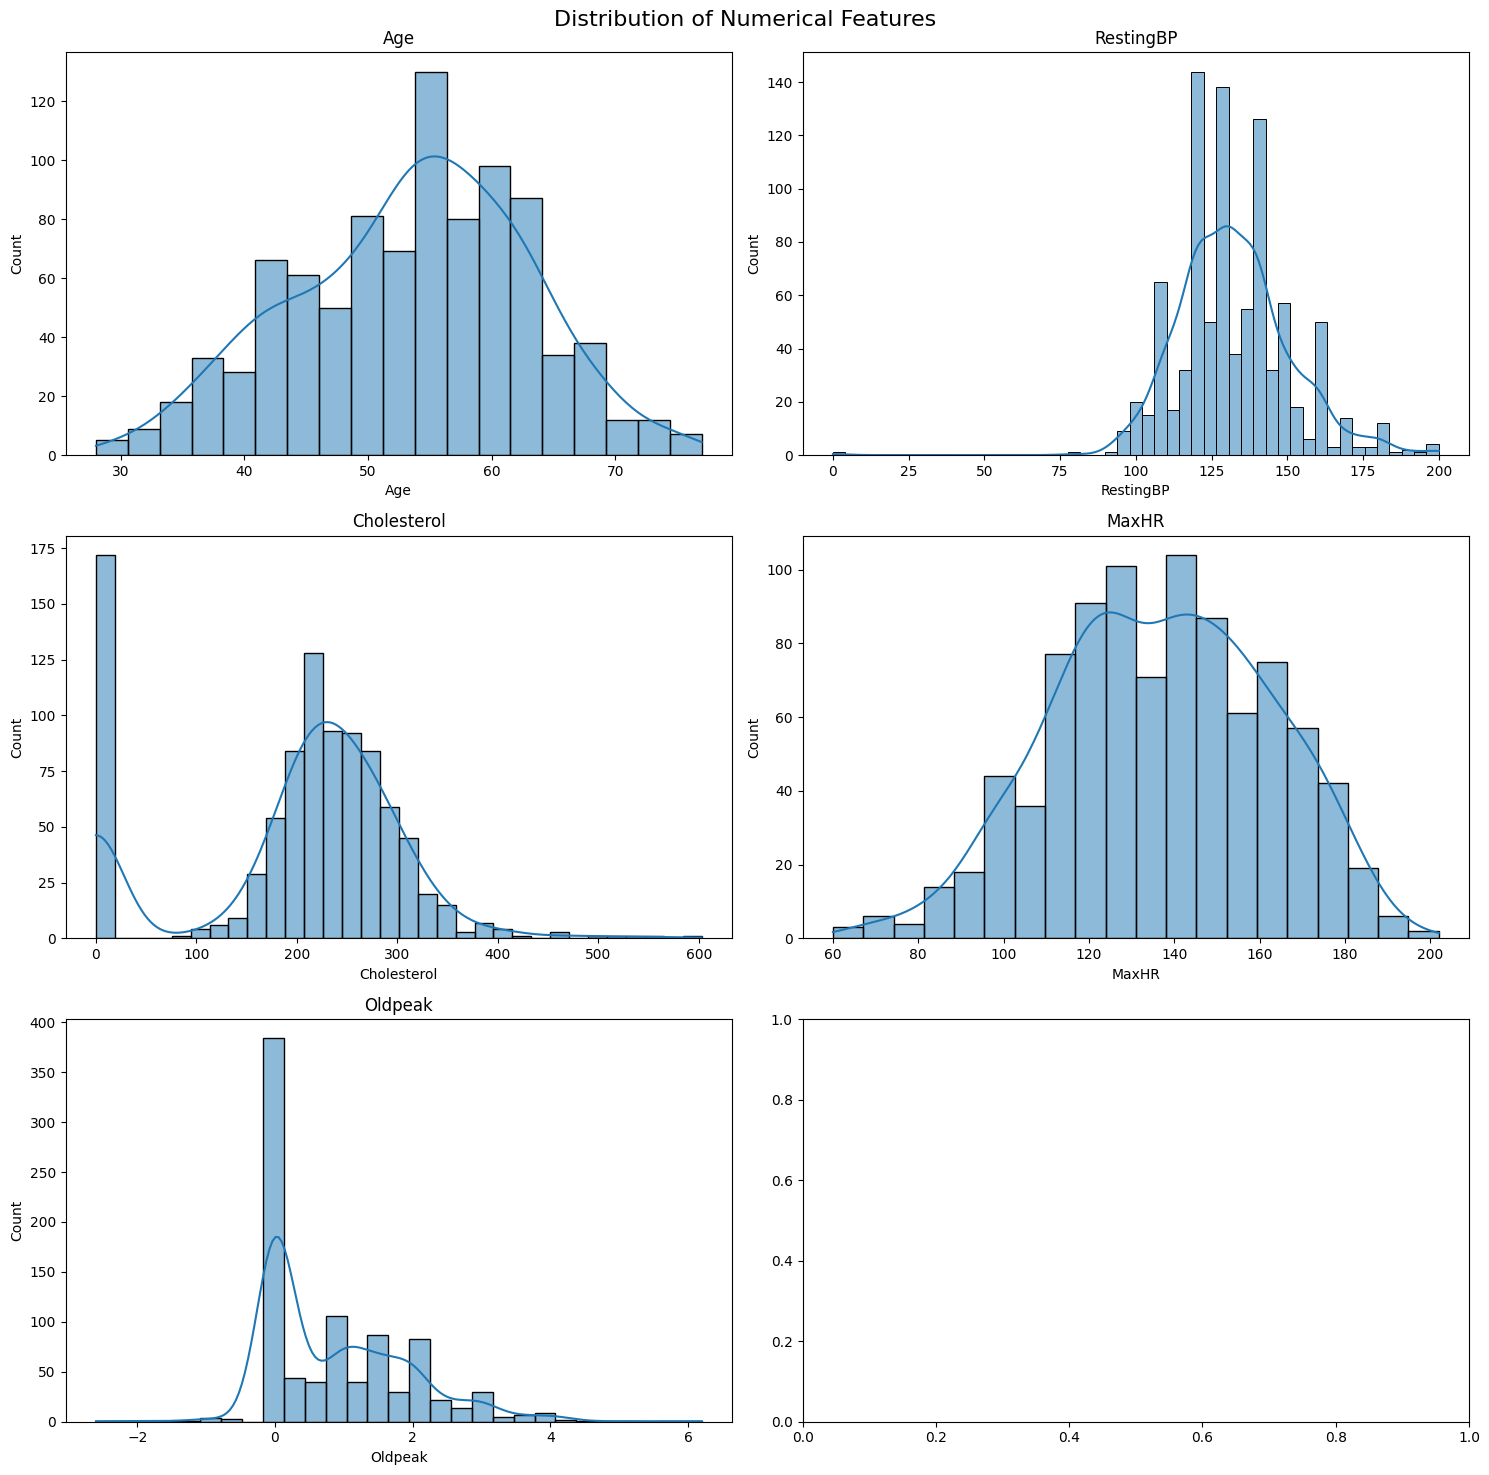

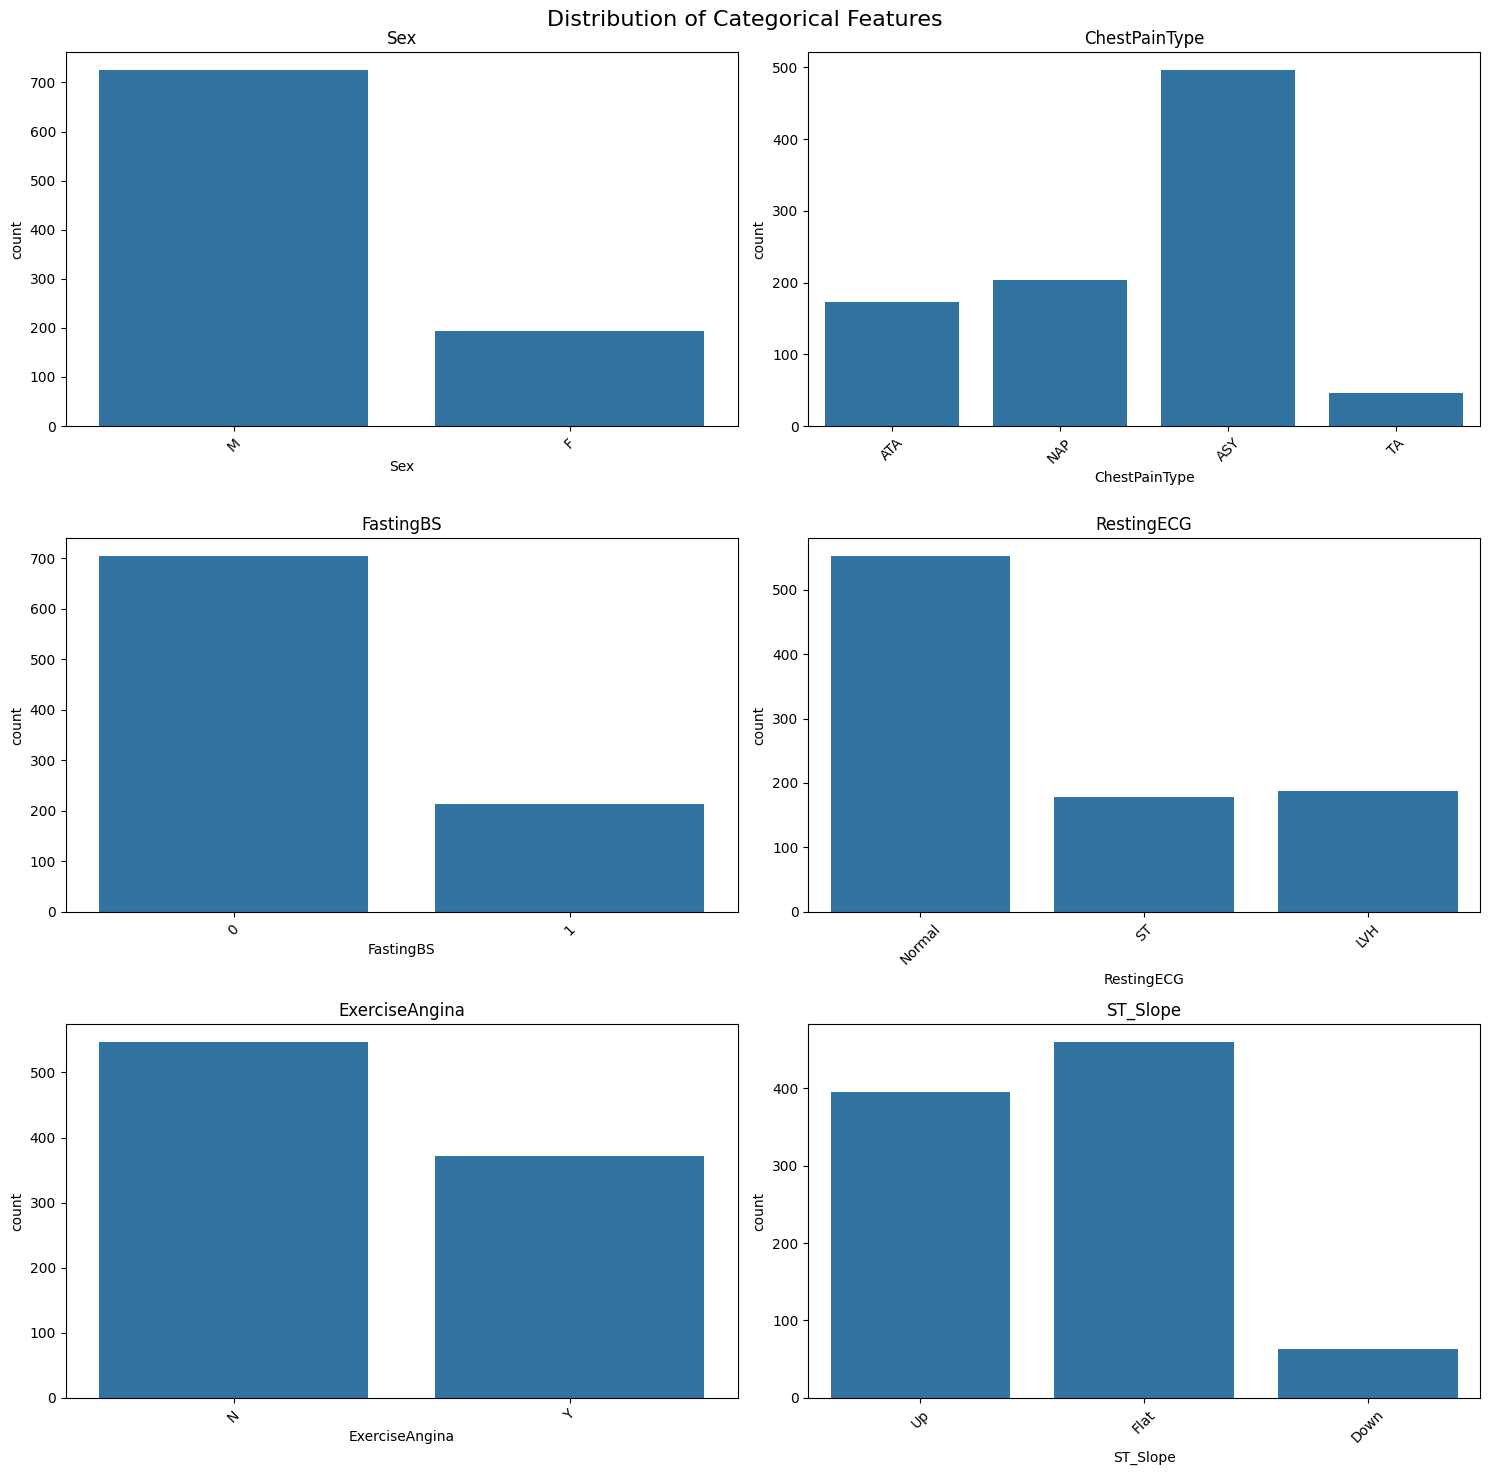

In [5]:
#  Analyze the distribution of each feature

# Numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(feature)

plt.tight_layout()
plt.show()

# Categorical features
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(feature)
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

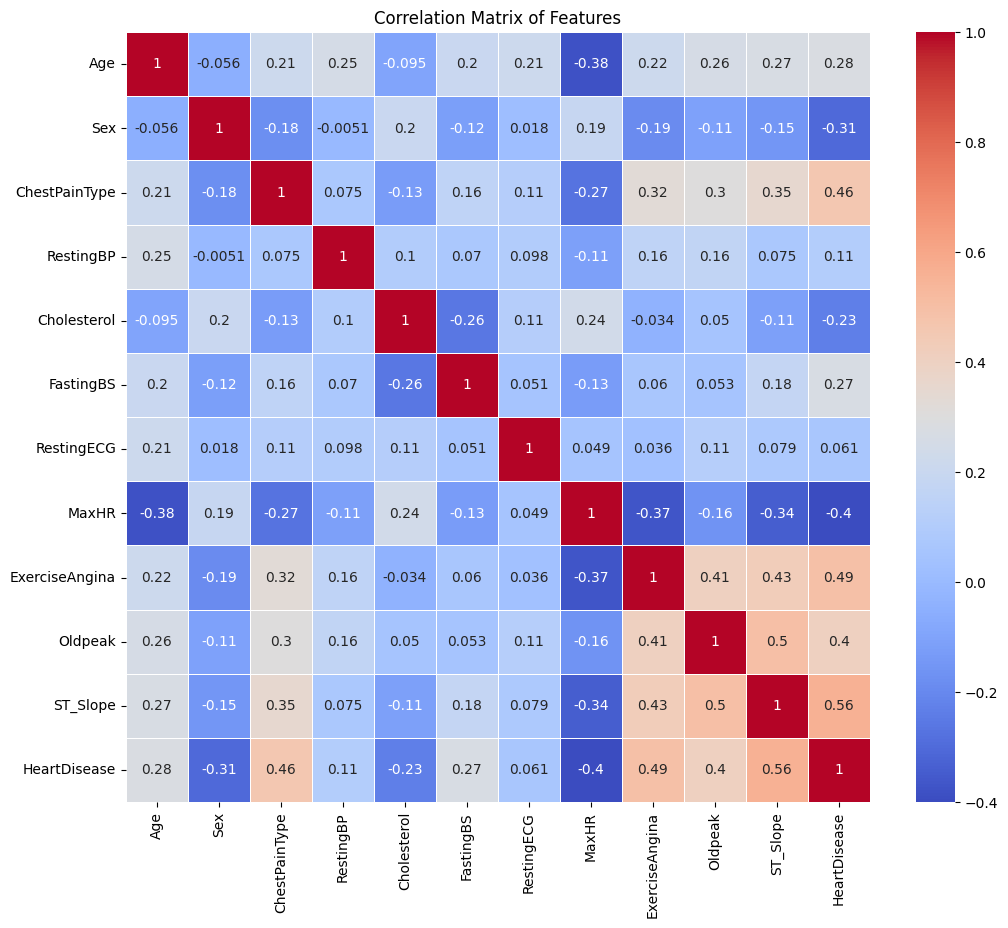

In [6]:
# Check for correlations between features

# Create a copy of the dataframe with encoded categorical variables
df_encoded = df.copy()

# Encode categorical variables
for feature in categorical_features:
    df_encoded[feature] = pd.factorize(df_encoded[feature])[0]

# Correlation matrix
corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

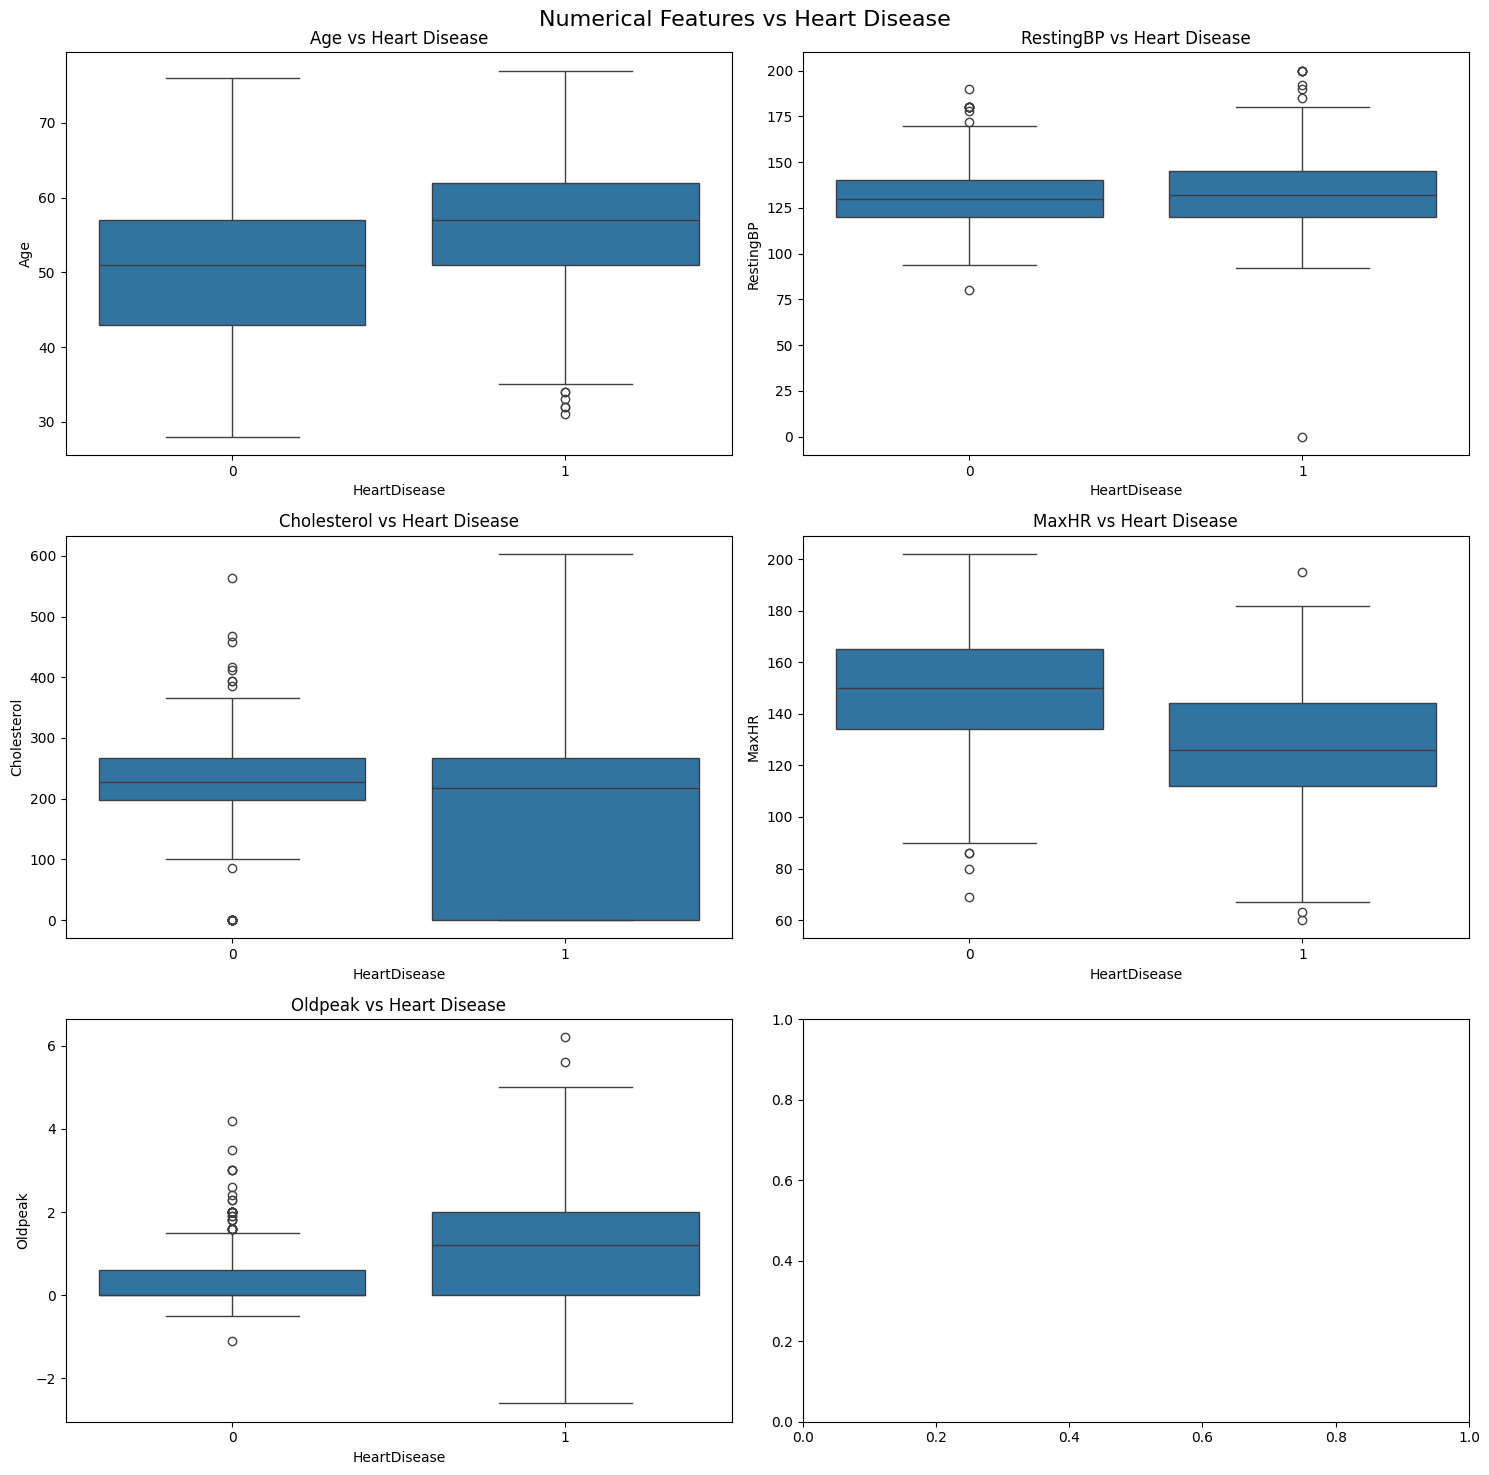

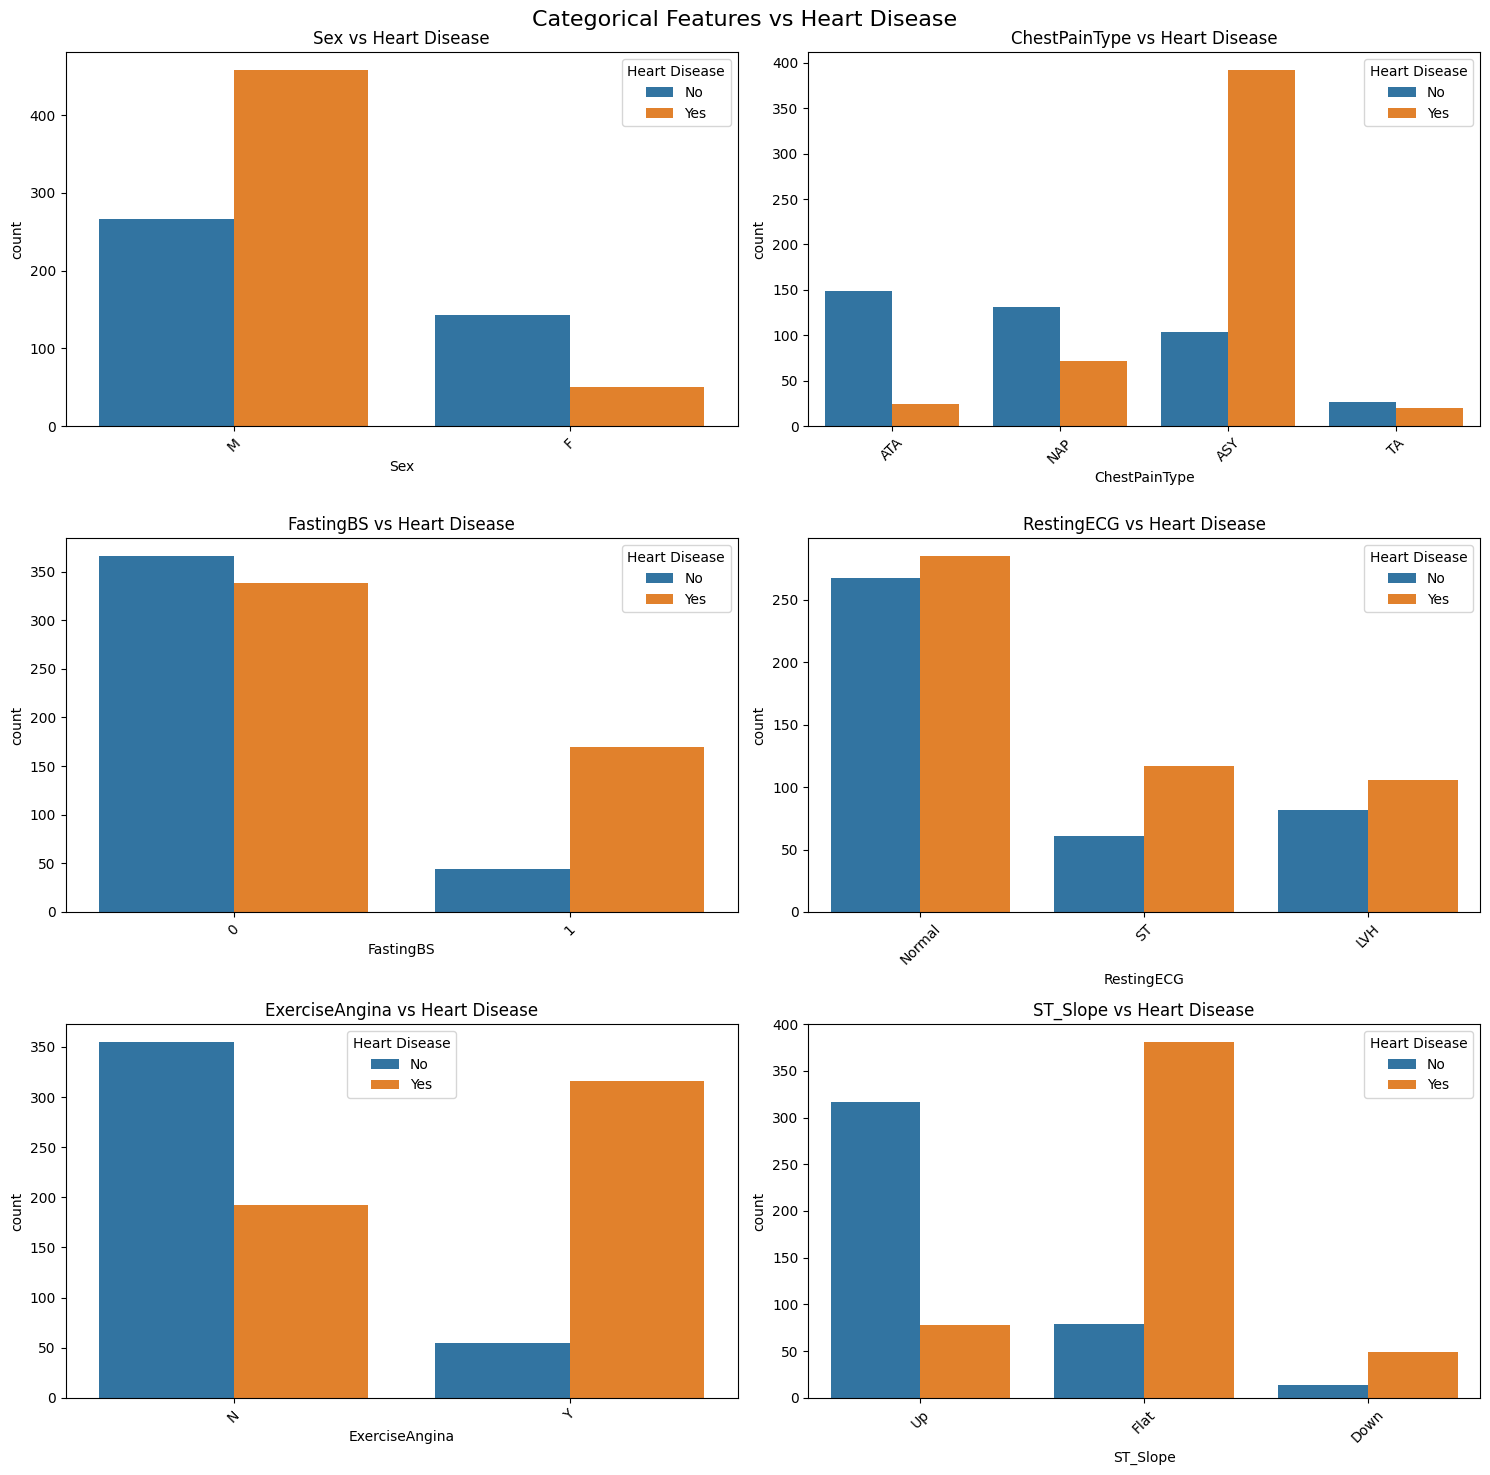

In [7]:
# Visualize relationships between features and the target variable

# Numerical features vs target
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Numerical Features vs Heart Disease', fontsize=16)

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='HeartDisease', y=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} vs Heart Disease')

plt.tight_layout()
plt.show()

# Categorical features vs target
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Categorical Features vs Heart Disease', fontsize=16)

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='HeartDisease', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} vs Heart Disease')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
    axes[i//2, i%2].legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

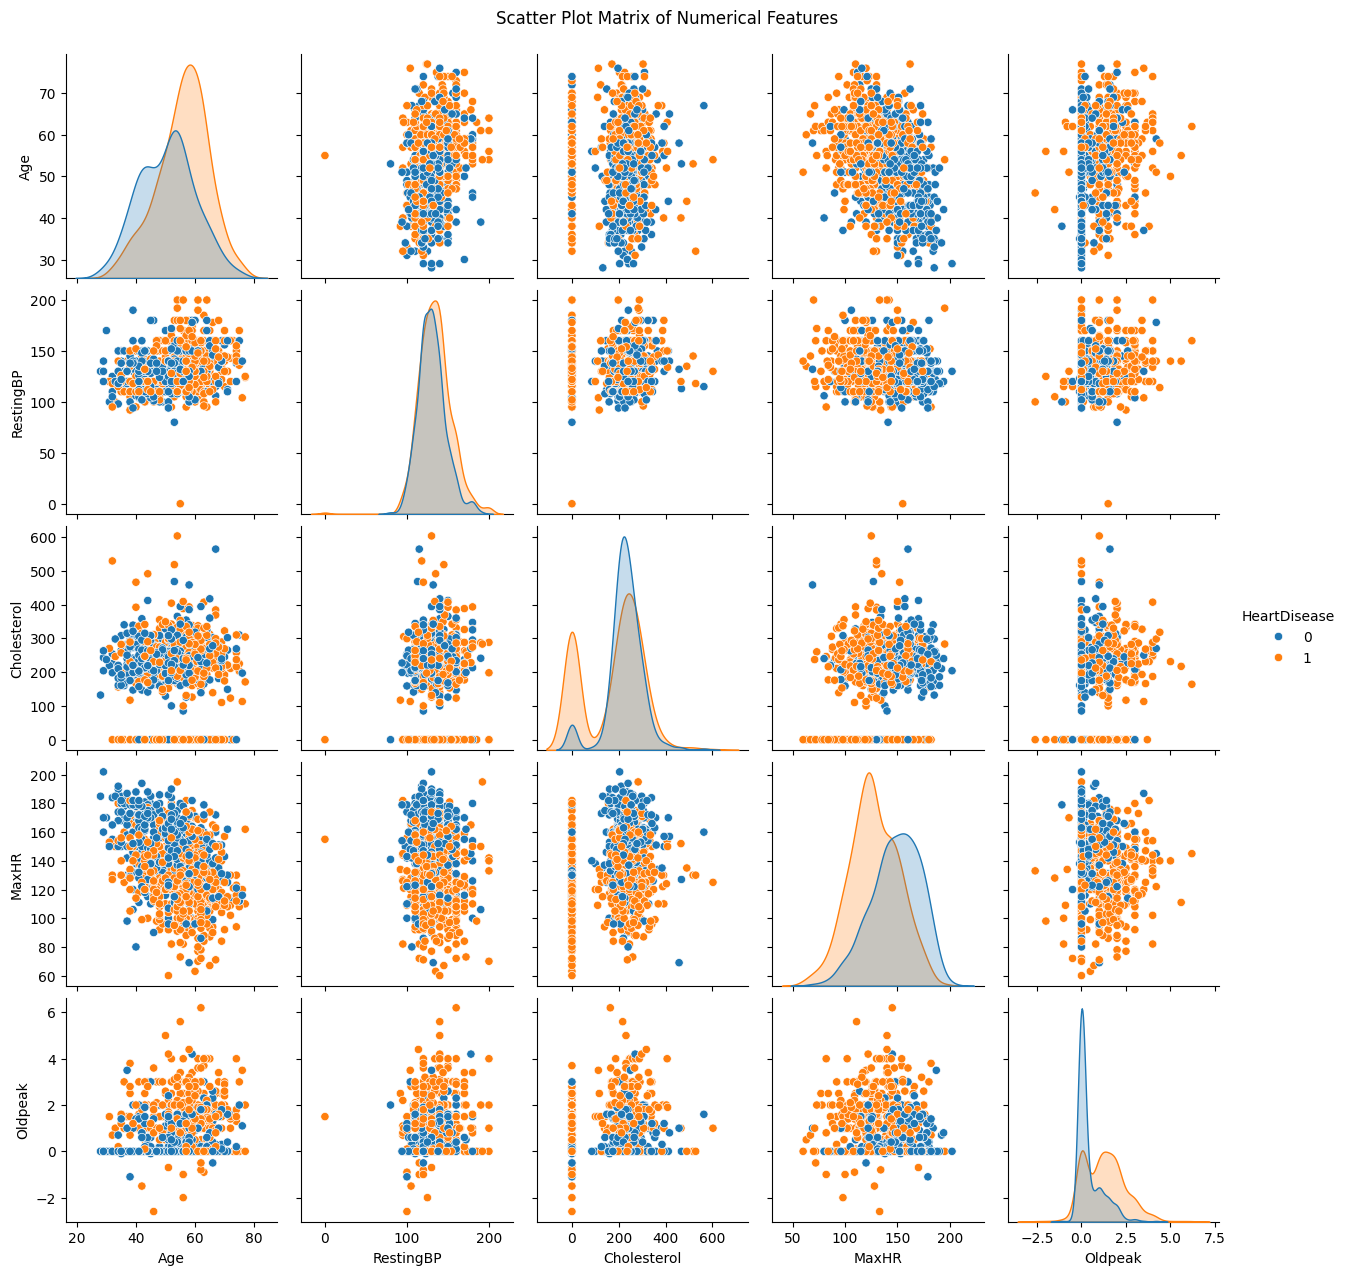

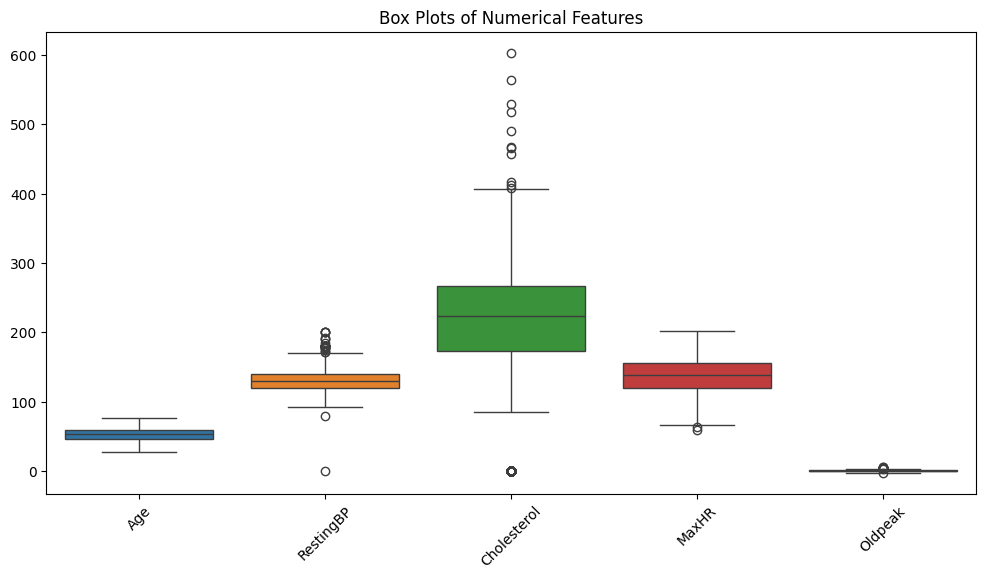

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 

In [8]:
# Identify any patterns or anomalies in the data

# Scatter plot matrix for numerical features
sns.pairplot(df[numerical_features + ['HeartDisease']], hue='HeartDisease')
plt.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
plt.show()

# Check for outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Print summary statistics
print(df.describe())

# Print info about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

Missing values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


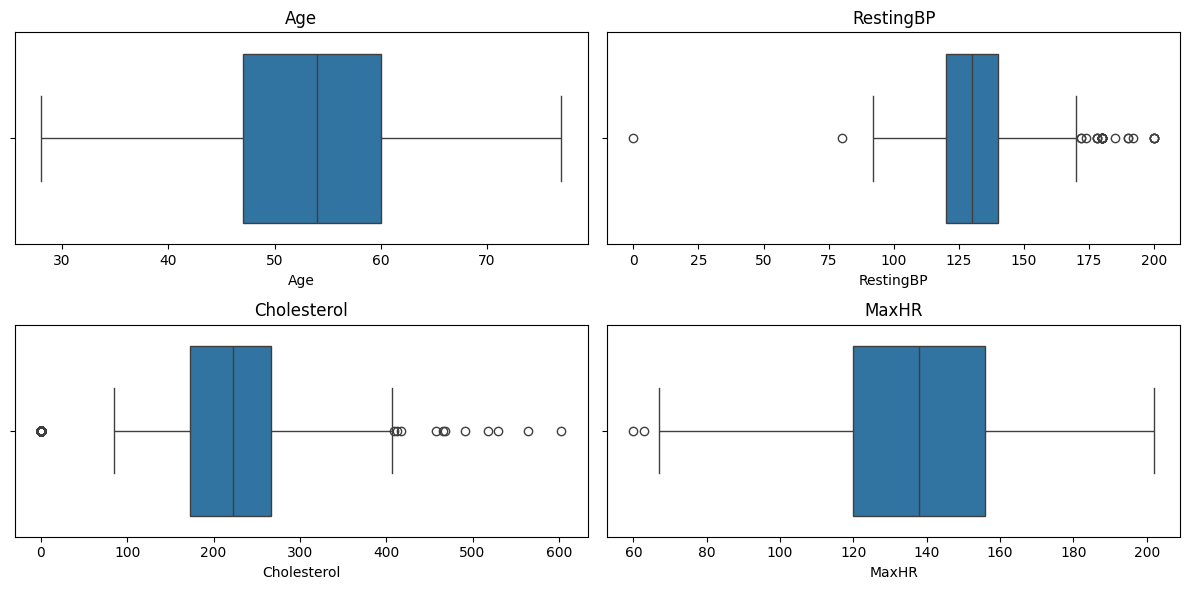

In [9]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())


# Identify and handle outliers

def plot_boxplot(df, features):
    fig, axes = plt.subplots(len(features) // 2, 2, figsize=(12, 3 * len(features) // 2))
    for i, feature in enumerate(features):
        sns.boxplot(x=df[feature], ax=axes[i // 2, i % 2])
        axes[i // 2, i % 2].set_title(feature)
    plt.tight_layout()
    plt.show()

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
plot_boxplot(df, numerical_features)

In [10]:
# remove outliers using IQR method
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [11]:
# Remove outliers from numerical features
for feature in numerical_features:
    df = remove_outliers(df, feature)

print(f"Shape after removing outliers: {df.shape}")

Shape after removing outliers: (713, 12)


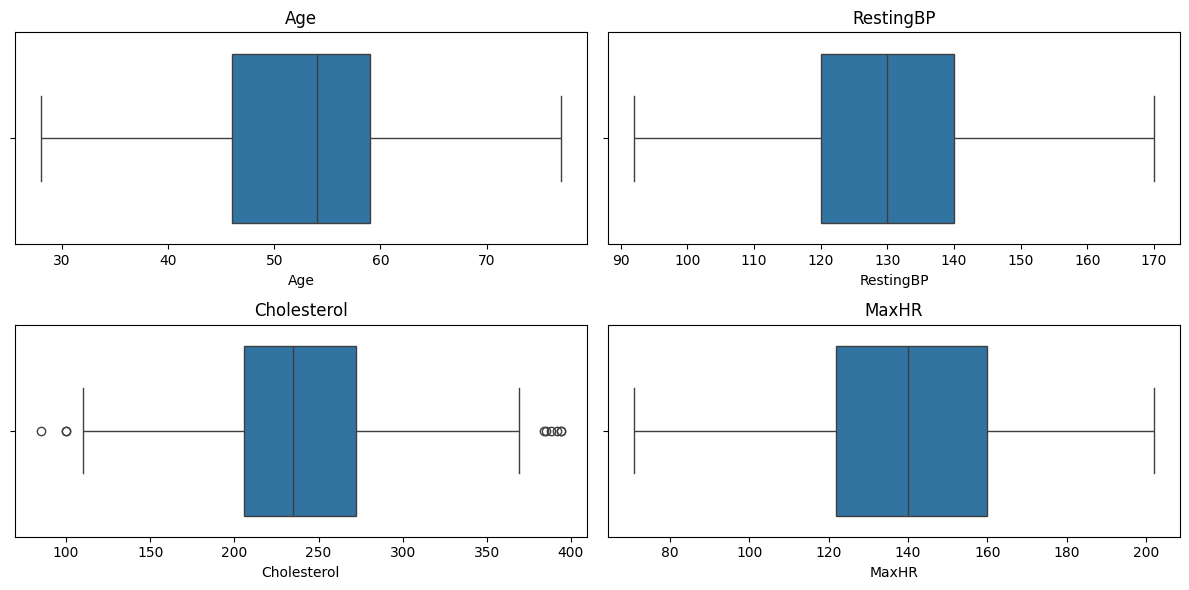


Age range:
count    713.000000
mean      52.807854
std        9.553418
min       28.000000
25%       46.000000
50%       54.000000
75%       59.000000
max       77.000000
Name: Age, dtype: float64


In [12]:
# Plot boxplots after removing outliers
plot_boxplot(df, numerical_features)

# c. Verify data consistency

# Check Age range
print("\nAge range:")
print(df['Age'].describe())

In [13]:
# Ensure Age is within a reasonable range (e.g., 18 to 100)
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Check RestingBP range
print("\nResting BP range:")
print(df['RestingBP'].describe())

# Ensure RestingBP is within a reasonable range (e.g., 80 to 200)
df = df[(df['RestingBP'] >= 80) & (df['RestingBP'] <= 200)]

# Check Cholesterol range
print("\nCholesterol range:")
print(df['Cholesterol'].describe())

# Ensure Cholesterol is within a reasonable range (e.g., 100 to 600)
df = df[(df['Cholesterol'] >= 100) & (df['Cholesterol'] <= 600)]

# Check MaxHR range
print("\nMax HR range:")
print(df['MaxHR'].describe())

# Ensure MaxHR is within a reasonable range (e.g., 60 to 220)
df = df[(df['MaxHR'] >= 60) & (df['MaxHR'] <= 220)]


Resting BP range:
count    713.000000
mean     131.650771
std       15.427251
min       92.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: RestingBP, dtype: float64

Cholesterol range:
count    713.000000
mean     239.586255
std       50.221797
min       85.000000
25%      206.000000
50%      235.000000
75%      272.000000
max      394.000000
Name: Cholesterol, dtype: float64

Max HR range:
count    712.000000
mean     140.414326
std       24.412961
min       71.000000
25%      122.000000
50%      140.000000
75%      160.000000
max      202.000000
Name: MaxHR, dtype: float64


In [14]:
# Verify categorical variables
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for feature in categorical_features:
    print(f"\nUnique values in {feature}:")
    print(df[feature].value_counts())

# Final dataset shape
print(f"\nFinal dataset shape: {df.shape}")

# Save the cleaned dataset
df.to_csv('heart_attack_dataset_cleaned.csv', index=False)
print("Cleaned dataset saved as 'heart_attack_dataset_cleaned.csv'")


Unique values in Sex:
Sex
M    543
F    169
Name: count, dtype: int64

Unique values in ChestPainType:
ChestPainType
ASY    349
NAP    163
ATA    160
TA      40
Name: count, dtype: int64

Unique values in FastingBS:
FastingBS
0    597
1    115
Name: count, dtype: int64

Unique values in RestingECG:
RestingECG
Normal    425
LVH       167
ST        120
Name: count, dtype: int64

Unique values in ExerciseAngina:
ExerciseAngina
N    440
Y    272
Name: count, dtype: int64

Unique values in ST_Slope:
ST_Slope
Up      338
Flat    335
Down     39
Name: count, dtype: int64

Final dataset shape: (712, 12)
Cleaned dataset saved as 'heart_attack_dataset_cleaned.csv'


In [15]:
# Load the cleaned dataset
df = pd.read_csv('heart_attack_dataset_cleaned.csv')

In [16]:
# Convert categorical variables to numerical

# Identify categorical and numerical columns
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Method 1: Label Encoding
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[f'{feature}_encoded'] = label_encoder.fit_transform(df[feature])

# Method 2: One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(df[categorical_features])
onehot_columns = onehot_encoder.get_feature_names_out(categorical_features)
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns)

# Combine one-hot encoded features with original dataframe
df = pd.concat([df, df_onehot], axis=1)

# b. Normalize or standardize numerical features

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [17]:
# Create new features (simulating BMI calculation)

# Since we don't have weight and height, let's create a simulated BMI feature
np.random.seed(42)  # for reproducibility
df['Weight'] = np.random.normal(70, 15, size=len(df))  # simulated weights, mean 70kg, std 15kg
df['Height'] = np.random.normal(1.7, 0.1, size=len(df))  # simulated heights, mean 1.7m, std 0.1m
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Create interaction features
df['Age_BP'] = df['Age'] * df['RestingBP']

# Create a feature for total cholesterol to HDL ratio (assuming Cholesterol is total cholesterol)
# This is a common cardiovascular risk factor
df['Cholesterol_Ratio'] = df['Cholesterol'] / df['Cholesterol'].mean()  # using mean as a proxy for HDL

# Drop original categorical columns and unnecessary columns
df = df.drop(columns=categorical_features + ['Weight', 'Height'])

# Print info about the preprocessed dataset
print(df.info())

# Save the preprocessed dataset
df.to_csv('heart_attack_dataset_preprocessed.csv', index=False)
print("Preprocessed dataset saved as 'heart_attack_dataset_preprocessed.csv'")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     712 non-null    float64
 1   RestingBP               712 non-null    float64
 2   Cholesterol             712 non-null    float64
 3   FastingBS               712 non-null    float64
 4   MaxHR                   712 non-null    float64
 5   Oldpeak                 712 non-null    float64
 6   HeartDisease            712 non-null    int64  
 7   Sex_encoded             712 non-null    int64  
 8   ChestPainType_encoded   712 non-null    int64  
 9   RestingECG_encoded      712 non-null    int64  
 10  ExerciseAngina_encoded  712 non-null    int64  
 11  ST_Slope_encoded        712 non-null    int64  
 12  Sex_F                   712 non-null    float64
 13  Sex_M                   712 non-null    float64
 14  ChestPainType_ASY       712 non-null    fl

In [18]:
# Check for any remaining missing values
print("\nMissing values:")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nFinal dataset shape:", df.shape)


Missing values:
Age                       0
RestingBP                 0
Cholesterol               0
FastingBS                 0
MaxHR                     0
Oldpeak                   0
HeartDisease              0
Sex_encoded               0
ChestPainType_encoded     0
RestingECG_encoded        0
ExerciseAngina_encoded    0
ST_Slope_encoded          0
Sex_F                     0
Sex_M                     0
ChestPainType_ASY         0
ChestPainType_ATA         0
ChestPainType_NAP         0
ChestPainType_TA          0
RestingECG_LVH            0
RestingECG_Normal         0
RestingECG_ST             0
ExerciseAngina_N          0
ExerciseAngina_Y          0
ST_Slope_Down             0
ST_Slope_Flat             0
ST_Slope_Up               0
BMI                       0
Age_BP                    0
Cholesterol_Ratio         0
dtype: int64

Final dataset shape: (712, 29)



--------------------------------------------------
Evaluating Logistic Regression
--------------------------------------------------
Cross-validation ROC AUC: 0.926 (+/- 0.069)
Test set ROC AUC: 0.921

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        72
         1.0       0.87      0.82      0.84        71

    accuracy                           0.85       143
   macro avg       0.85      0.85      0.85       143
weighted avg       0.85      0.85      0.85       143



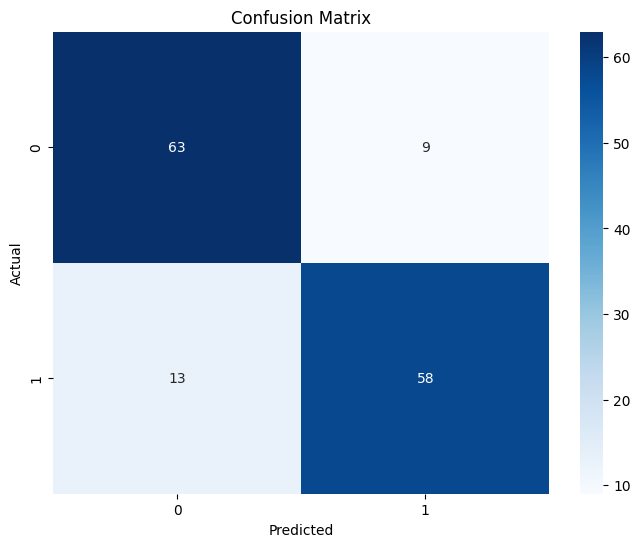


--------------------------------------------------
Evaluating Random Forest
--------------------------------------------------
Cross-validation ROC AUC: 0.930 (+/- 0.072)
Test set ROC AUC: 0.942

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        72
         1.0       0.89      0.89      0.89        71

    accuracy                           0.89       143
   macro avg       0.89      0.89      0.89       143
weighted avg       0.89      0.89      0.89       143



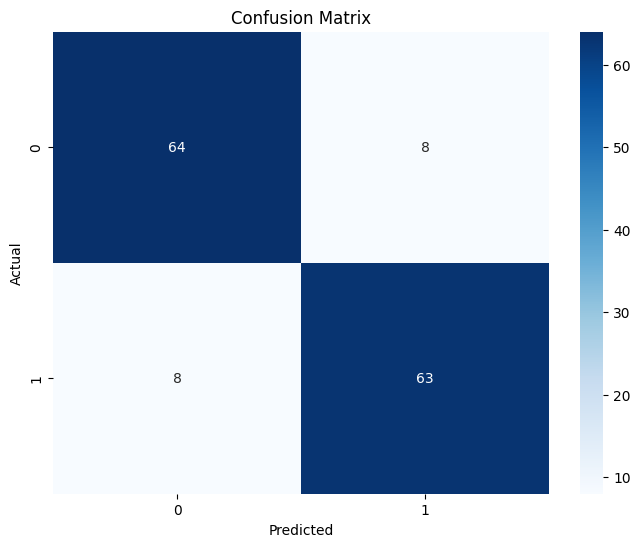


--------------------------------------------------
Evaluating SVM
--------------------------------------------------
Cross-validation ROC AUC: 0.927 (+/- 0.077)
Test set ROC AUC: 0.920

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        72
         1.0       0.85      0.87      0.86        71

    accuracy                           0.86       143
   macro avg       0.86      0.86      0.86       143
weighted avg       0.86      0.86      0.86       143



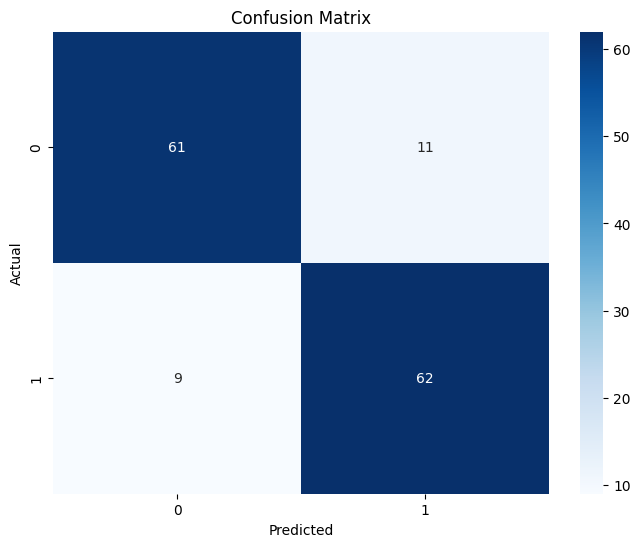

In [36]:
# Confusion Matrix
def evaluate_model(model, X, y, X_test, y_test):
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

    # Train on full training data
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    print(f"Cross-validation ROC AUC: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    print(f"Test set ROC AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Evaluate each model
for name, model in models.items():
    print(f"\n{'-'*50}\nEvaluating {name}\n{'-'*50}")
    evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)


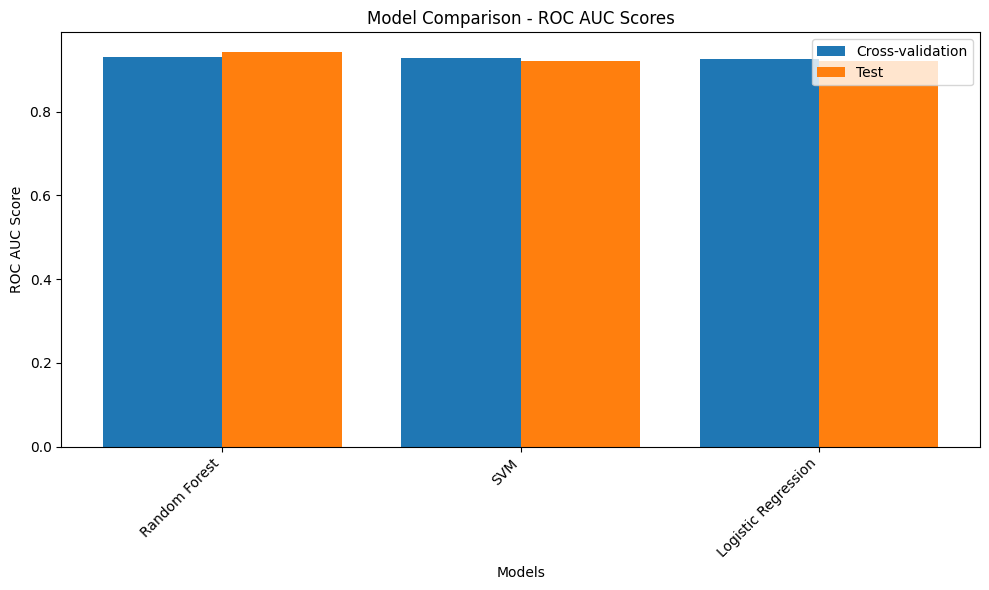

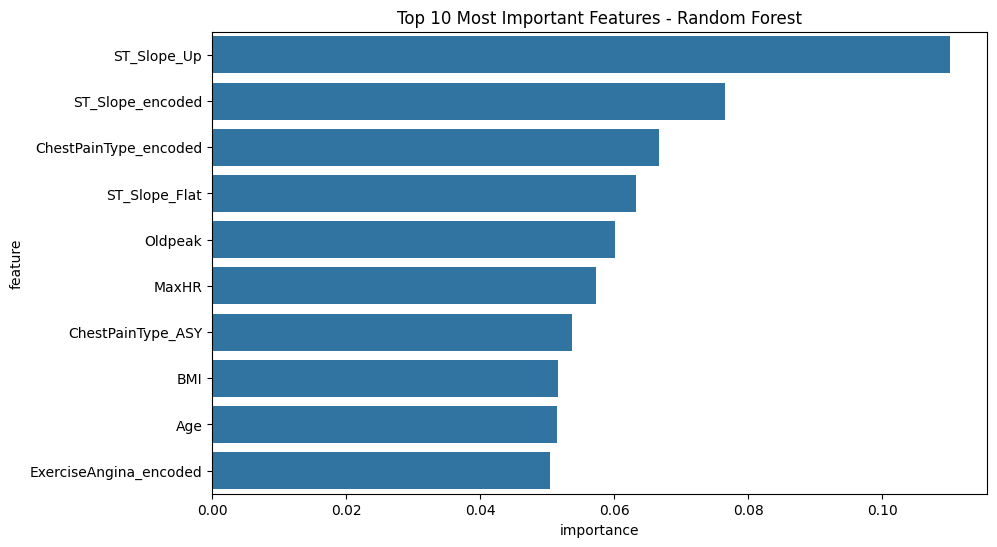

In [40]:
# Initialize empty lists to store results
cv_results = []
test_results = []

# Evaluate each model and store results
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    cv_results.append((name, cv_scores.mean()))

    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    test_results.append((name, roc_auc_score(y_test, y_pred_proba)))

# Plot comparison
plt.figure(figsize=(10, 6))
cv_results.sort(key=lambda x: x[1], reverse=True)
test_results.sort(key=lambda x: x[1], reverse=True)

x = range(len(models))
plt.bar([i - 0.2 for i in x], [r[1] for r in cv_results], width=0.4, label='Cross-validation', align='center')
plt.bar([i + 0.2 for i in x], [r[1] for r in test_results], width=0.4, label='Test', align='center')
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('Model Comparison - ROC AUC Scores')
plt.xticks(x, [r[0] for r in cv_results], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance for the best model
best_model = max(test_results, key=lambda x: x[1])[0]
if best_model in ['Random Forest', 'Logistic regression', 'SVM']:
    model = models[best_model]
    model.fit(X_train_scaled, y_train)
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title(f'Top 10 Most Important Features - {best_model}')
    plt.show()
else:
    print(f"Feature importance plot not available for {best_model}")
